Vamos a probar el LsqFit con la funcion ficticia del otro cuaderno, que vagamente se parece
a la derivada del spiklet linearizada por piezas.

In [91]:
using LsqFit, PyPlot

Esta es la funcion linearizada por piezas. x es la variable libre, el resto son parametros acorde a lo siguiente:
xini=principio del dominio
xfin=fin del dominio.
xzeros=los puntos de quiebre internos
yzeros=las alturas de los puntos de quiebre internos y externo.
mzeronuno=la altura del primer punto del dominio

In [66]:
function lpp(x, xini, xfin, xzeros, yzeros, mzerouno)
    y=0
    
    ll=length(xzeros)+1
    
    #if ll!=length(yzeros)
     #   error("tu particion no contiene tantos parametros como necesitas")
    if (x<xini || x>=xfin)
        error("x fuera del dominio")
    end
    
    mzeros=zeros(ll)
    mzeros[1]=mzerouno
    xaux=vcat(xini, xzeros, xfin)   
   # println(xaux)
    
    for k=2:ll
        
        mzeros[k]=(yzeros[k-1]-yzeros[k])*xaux[k]+mzeros[k-1]
    end
    

    
    for k=1:(ll-1)
        if xaux[k] <= x < xaux[k+1]
          #  println(xaux[k], " ", x, " ", xaux[k+1])
         y = yzeros[k]*x+mzeros[k]
        end
    end
    
    return y

end

lpp (generic function with 1 method)

Un posible ejemplo, ranguilllo es el dominio y el resto son parametros.

In [67]:
ranguilllo=0.01:0.1:9.99
xzeros2=[3,4,5]
yzeros2=[-5, 5, 0.8, 0.1]
mzero2=10

10

Datos ficticios. las yys, son datos ruidosos y las oyy los datos "perfectos"

In [92]:
yys=map(x->lpp(x, 0,10, xzeros2, yzeros2, mzero2), ranguilllo).+1.5*randn(length(ranguilllo));
oyy=map(x->lpp(x, 0,10, xzeros2, yzeros2, mzero2), ranguilllo);

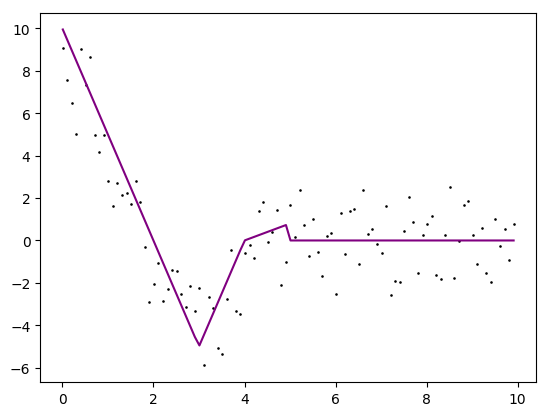

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3a99e1b438>

In [93]:
scatter(ranguilllo,yys, s=0.75, c="black")
plot(ranguilllo, oyy, c="purple")

No estoy muy seguro, pero en los ejemplos de LsqFit usan funciones "vectorizadas", asi que la vectorizamos de la siguiente forma. Notese la diferencia con vectorizacion "magica" usando @. No funciona la ultima en este caso.

In [94]:
xi=0.0
xf=10
model3(x,p)=map(xr->lpp(xr, xi,xf, p[1:3], p[4:7], p[8]),x)

model3 (generic function with 1 method)

Solo para tener una idea, hacemos unos valores ooy usando el modelo con los valores iniciales pintento de los parametros que vamos a intentar.

In [96]:
pintento=[3,4,5,-5, 5, 0.8, 0.1,10];

In [97]:
ooy=model3(ranguilllo,pintento);

Aqui es donde se aplica la adaptacion usando LsqFit, notese el orden de los parametros.

In [84]:
fit3 = curve_fit(model3, ranguilllo, yys, pintento)

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([3.00037, 4.21001, 5.0, -4.73477, 4.57013, -0.786406, 0.1, 9.52166], [-0.150774, 1.477, -0.227928, -1.23432, -0.0696886, 0.00123922, 0.534815, -0.828162, -0.286605, 1.6766  …  1.12408, -2.80018, 0.64327, -0.00173569, -0.86882, -0.154482, 0.362739, -0.683636, -1.73891, 1.2079], [0.0 0.0 … 0.0 1.0; 0.0 0.0 … 0.0 1.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], true, Float64[])

Aqui estan los parametros encontrados

In [100]:
pp=fit3.param

8-element Array{Float64,1}:
  3.0003744302728843
  4.210005618049525 
  5.0               
 -4.734769993999135 
  4.57013154163964  
 -0.7864055686456297
  0.1               
  9.521663797353554 

Probablemente hay una manera mas simple de ver esto, pero hagamos ahora la funcion lpp con los parametros descubiertos.

In [87]:
modelfitted(x)=map(xr->lpp(xr, xi,xf, pp[1:3], pp[4:7], pp[8]),x)

modelfitted (generic function with 1 method)

Y calculamos las alturas con esa funcion.

In [101]:
yfit=modelfitted(ranguilllo);

Aqui comparamos la encontrada con la original.
Yeah!! BITCHES!!

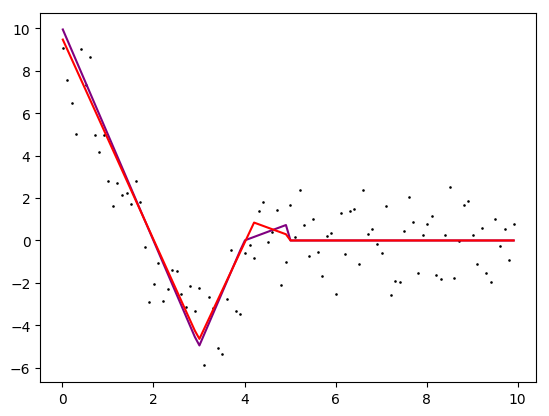

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3a99bc6cc0>

In [103]:
scatter(ranguilllo,yys, s=0.75, c="black")
plot(ranguilllo, oyy, c="purple")
plot(ranguilllo,yfit, c="red")